# Estimating Parameters in Network Models via MLE

When we learned about random networks which can be described using single network models, one of the key things we covered were the *parameters* that define the underlying random networks. If we see a network which is a realization of a random network, we do *not*, in practice, know what those parameters that describe the random network are. However, we have a slight problem, because learning about the underlying random network *requires* us to have some understanding of the parameters that define it. What are we to do?

To overcome this hurdle, we must *estimate* the parameters of the underlying random network. At a very high level, **estimation** is a procedure to calculate properties about a random variable (or a set of random variables) using only the data we are given: finitely many (in network statistics, often just one) samples which we assume are realizations of the random variable we want to learn about. Here, what we want to obtain are ways in which we can *estimate* the parameters of the underlying random network, when we have a realization of a random network.

## Erdös-Rényi (ER)

Recall that the Erdös-Rényi (ER) network has a single parameter: the probability of each edge existing, which we termed $p$. Due to the simplicity of a random network which is ER, we can resort to the Maximum Likelihood technique we described above, and it turns out we obtain virtually the same result. We find that the best estimate of the probability of an edge existing in an ER random network is just the ratio of the total number of edges in the network, $m$, divided by the total number of edges possible in the network, which is $\binom n 2$! Our result is:
\begin{align*}
    \hat p &= \frac{m}{\binom n 2}.
\end{align*}

Intuitively, the estimate of the probability $p$ is the ratio of how many edges we see in the network, $m$, and how many edges we could have seen $\binom n 2$! To bring this back to our coin flip example, this is like we are saying that there is a single coin. We flip the coin once for every possible edge between those pairs of communities, $\binom n 2$. When that coin lands on heads, that particular edge is determined to exist, and when it lands on tails, that edge does not exist. Our best guess, then, is just to count the number of heads we obtained, $m$, and divide by the number of coin flips we made, $\binom n 2$. 

Let's work on an example. We will use a realization of a random network which is ER, with $40$ nodes and an edge probability of $0.2$. We begin by simulating and visualizing the appropriate network: 

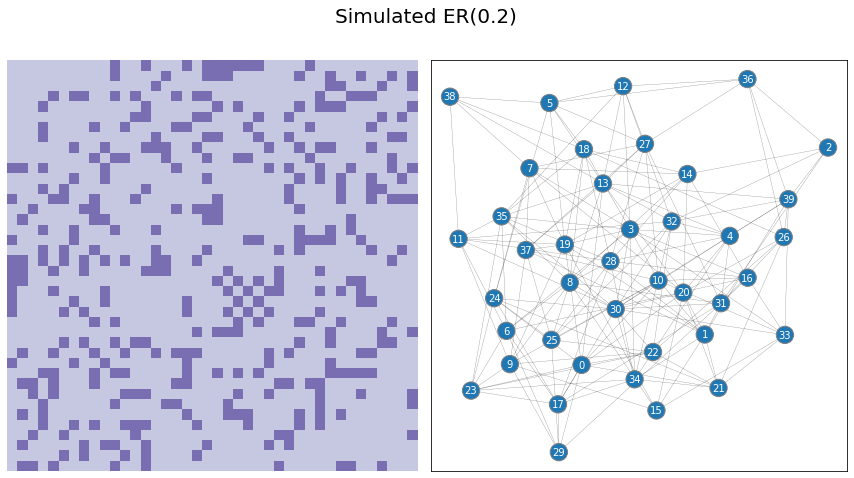

In [1]:
from graspologic.simulations import er_np
from graphbook_code import draw_multiplot

A = er_np(n=40, p=0.2)

draw_multiplot(A, title="Simulated ER(0.2)");

Next, we fit the appropriate model, from graspologic, and plot the estimated probability matrix $\hat P$ against the true probability matrix $P$:

In [2]:
from graspologic.plot import heatmap
import matplotlib.pyplot as plt
import numpy as np
from graspologic.models import EREstimator

model = EREstimator(directed=False, loops=False)
model.fit(A)
Phat = model.p_mat_

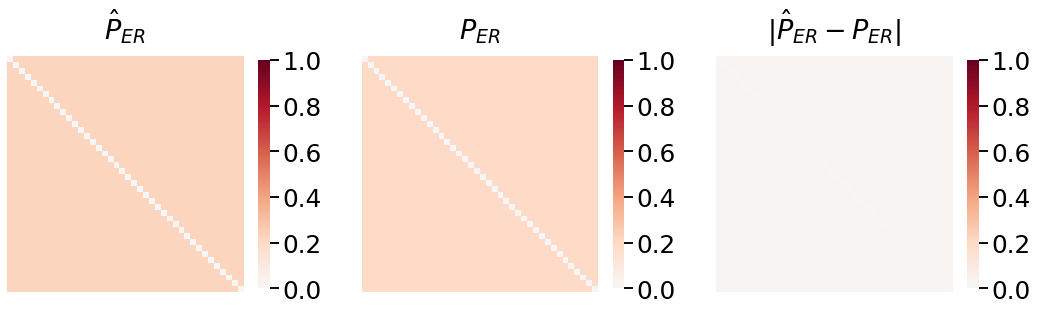

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

heatmap(Phat,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$\hat P_{ER}$",
        ax=axs[0])

P = 0.2*np.ones((40, 40))  # default entries to 0.2
P = P - np.diag(np.diag(P))

heatmap(P,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$P_{ER}$",
        ax=axs[1])

heatmap(np.abs(Phat - P),
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$|\hat P_{ER} - P_{ER}|$",
        ax=axs[2])

fig;

Not half bad! The estimated probability matrix $\hat P$ looks extremely similar to the true probability matrix $P$.


## Stochastic Block Model

The Stochastic Block Model also has a single parameter: the block matrix, $B$, whose entries $b_{kk'}$ denote the probabilities of edges existing or not existing between pairs of communities in the Stochastic Block Model. When we apply the method of MLE to the SBM, what we find is that, where $m_{kk'}$ is the total number of edges between nodes in communities $k$ and $k'$, and $n_{kk'}$ is the number of edges possible between nodes in communities $k$ and $k'$:

\begin{align*}
    \hat b_{kk'} = \frac{m_{kk'}}{n_{kk'}}.
\end{align*}

Intuitively, the estimate of the block probability $b_{kk'}$ is the ratio of how many edges we see between communities $k$ and $k'$ $m_{kk'}$ and how many edges we could have seen $n_{kk'}$! To bring this back to our coin flip example, this is like we are saying that there is one coin called coin $(k, k')$ for each pair of communities in our network. We flip each coin once for every possible edge between those pairs of communities, $n_{kk'}$. When that coin lands on heads, that particular edge is determined to exist, and when it lands on tails, that edge does not exist. Our best guess, then, is just to count the number of heads we obtained, $m_{kk'}$, and divide by the number of coin flips we made, $n_{kk'}$. 

Let's work through an example network, with 20 nodes in each community, and a block matrix of:
\begin{align*}
    B &= \begin{bmatrix}
        .8 & .2 \\
        .2 & .8
    \end{bmatrix}
\end{align*}

Which corresponds to a probability matrix $P$ where each entry is:
\begin{align*}
    p_{ij} &= \begin{cases}
    0.8 & i, j \leq 20 \text{ or }i, j \geq 20 \\
    0.2 & \text{otherwise}
    \end{cases}
\end{align*}

We begin by simulating an appropriate SBM:

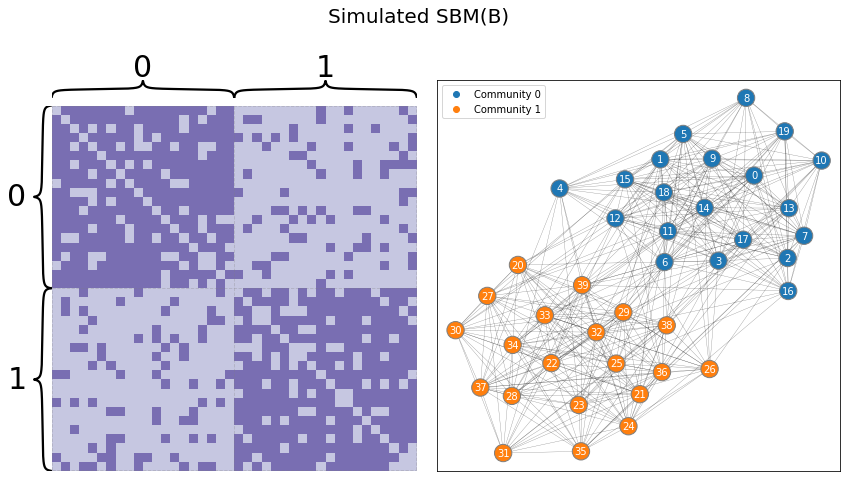

In [4]:
from graspologic.simulations import sbm

n = [20, 20]
B = [[.8, .2],
     [.2, .8]]

A = sbm(n=n, p=B)

y = [0 for i in range(0,n[0])] + [1 for i in range(0, n[1])]
draw_multiplot(A, labels=y, title="Simulated SBM(B)");

Next, let's fit an appropriate SBM, and investigate the estimate of $B$:

In [5]:
from graspologic.models import SBMEstimator

model = SBMEstimator(directed=False, loops=False)
model.fit(A, y=y)
Bhat = model.block_p_
Phat = model.p_mat_

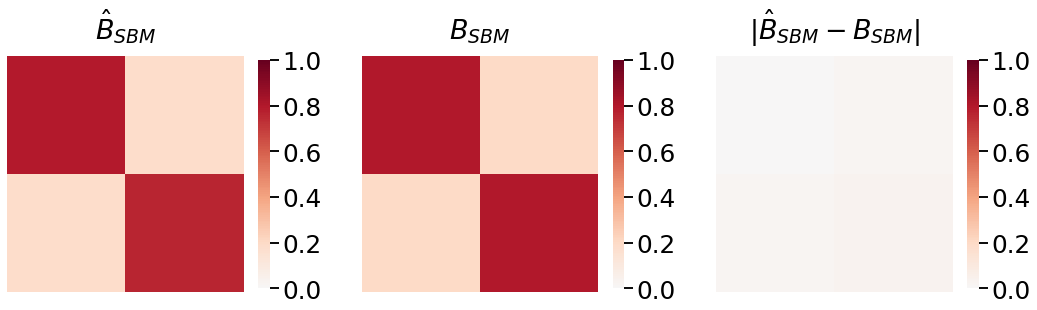

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

heatmap(Bhat,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$\hat B_{SBM}$",
        ax=axs[0])

heatmap(np.array(B),
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$B_{SBM}$",
        ax=axs[1])

heatmap(np.abs(Bhat - np.array(B)),
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$|\hat B_{SBM} - B_{SBM}|$",
        ax=axs[2])

fig;

And our estimate $\hat B$ is very similar to the true block matrix $B$. This is further reflected by looking at the probability matrix, like we did for the ER example:

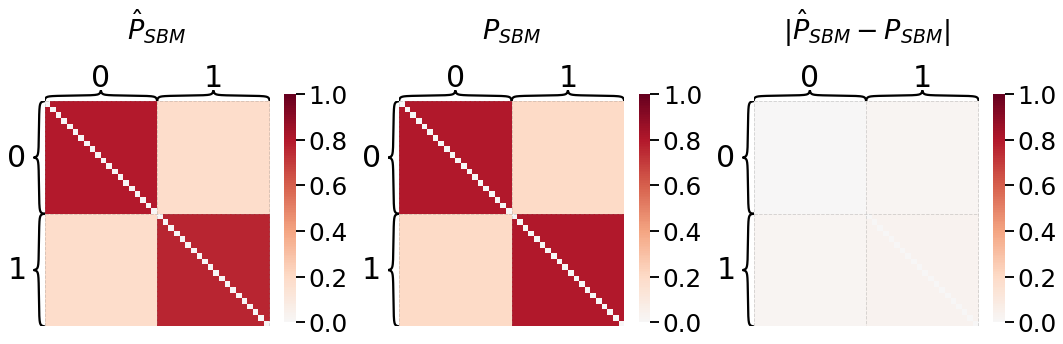

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

heatmap(Phat,
        inner_hier_labels=y,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$\hat P_{SBM}$",
        ax=axs[0])

P = 0.2*np.ones((n[0] + n[1], n[0] + n[1]))  # default entries to 0.2
P[0:20,0:20] = 0.8  # B11
P[20:40,20:40] = 0.8  # B22
np.fill_diagonal(P, 0)  # loopless

heatmap(P,
        inner_hier_labels=y,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$P_{SBM}$",
        ax=axs[1])

heatmap(np.abs(Phat - P),
        inner_hier_labels=y,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$|\hat P_{SBM} - P_{SBM}|$",
        ax=axs[2])

fig;